In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import GRU, Dense
from tensorflow import keras
from keras.callbacks import EarlyStopping


In [2]:
# 讀取數據
dataItem = read_csv('./PD_adddate2.csv', usecols=[15], engine='python')

(738, 1)


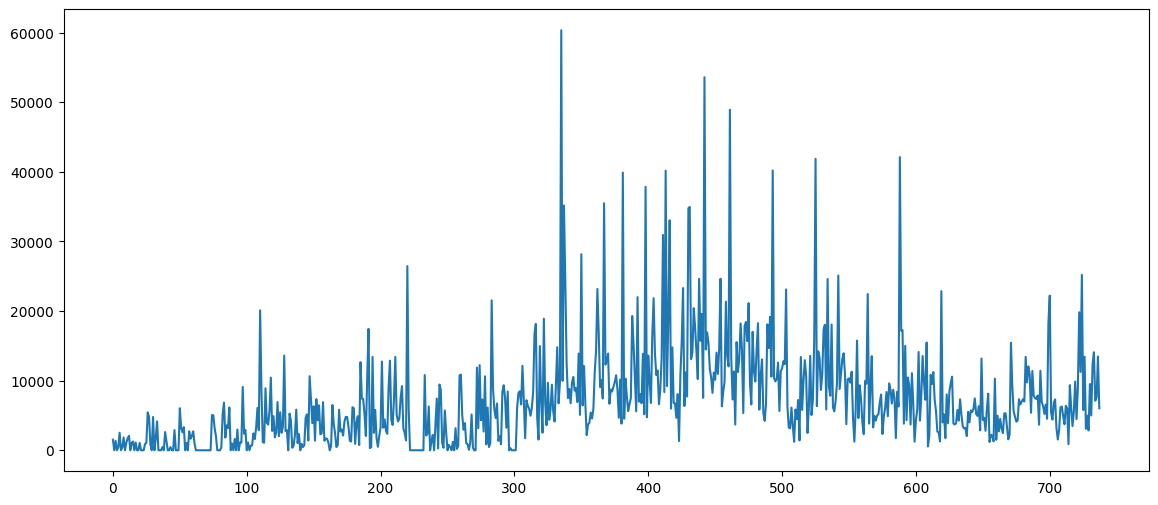

In [3]:
data = dataItem.values
data = data.astype('float32')
# 繪製原始數據
plt.figure(figsize=(14, 6))
print(data.shape)
plt.plot(data)
plt.show()

In [4]:
# 數據預處理
def GetDataAndLabel(data, TimeStep):
    trainData, trainLabel = [], []
    for i in range(len(data)-TimeStep):
        TrainDataOne = data[i:(i+TimeStep), 0]
        trainData.append(TrainDataOne)
        trainLabel.append(data[i+TimeStep, 0])
    return np.array(trainData), np.array(trainLabel)


In [5]:
# 歸一化
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [6]:
# 切分訓練集和測試集
TrainDataNum = int(len(data) * 0.8)
TestDataNum = len(data) - TrainDataNum
trainData = data[0:TrainDataNum, :]
testData = data[TrainDataNum:len(data), :]
# 數據標籤
TimeStep = 14
traindataNew, trainLabelNew = GetDataAndLabel(trainData, TimeStep)
testdataNew, testLabelNew = GetDataAndLabel(testData, TimeStep)
print("traindataNew.shape :",traindataNew.shape)
print("trainLabelNew.shape :",trainLabelNew.shape)
print("testdataNew.shape :",testdataNew.shape)
print("testLabelNew.shape :",testLabelNew.shape)


traindataNew.shape : (576, 14)
trainLabelNew.shape : (576,)
testdataNew.shape : (134, 14)
testLabelNew.shape : (134,)


In [7]:
# 改變維度
traindataNew = np.reshape(traindataNew, (traindataNew.shape[0], traindataNew.shape[1], 1))
testdataNew = np.reshape(testdataNew, (testdataNew.shape[0], testdataNew.shape[1], 1))
print("traindataNew.shape :",traindataNew.shape)
print("testdataNew.shape :",testdataNew.shape)


traindataNew.shape : (576, 14, 1)
testdataNew.shape : (134, 14, 1)


In [8]:
# 建立模型
model = keras.Sequential()
model.add(GRU(256, input_shape=(TimeStep, 1), return_sequences=True))
model.add(GRU(128, input_shape=(TimeStep, 1), return_sequences=True))
model.add(GRU(64, input_shape=(TimeStep, 1)))
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 256)           198912    
                                                                 
 gru_1 (GRU)                 (None, 14, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 384,449
Trainable params: 384,449
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# 編譯和訓練模型
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)
# early_stopping = EarlyStopping(monitor='loss', patience=50, verbose=1)
hist = model.fit(traindataNew, trainLabelNew, epochs=500, batch_size=32, verbose=1)
# hist = model.fit(traindataNew, trainLabelNew, epochs=500, batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/500
18/18 [==============================] - 4s 13ms/step - loss: 0.0155
Epoch 2/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0131
Epoch 3/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0129
Epoch 4/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0130
Epoch 5/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 6/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 7/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0128
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 9/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 10/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 11/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 12/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0129
Epoch 13/500
18/18 [=====

18/18 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 102/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0123
Epoch 103/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 104/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 105/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0118
Epoch 106/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0121
Epoch 107/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0122
Epoch 108/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 109/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0120
Epoch 110/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0118
Epoch 111/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 112/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0122
Epoch 113/500
18/1

Epoch 200/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 201/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 202/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 203/500
18/18 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 204/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0025
Epoch 205/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 206/500
18/18 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 207/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 208/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 209/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0020
Epoch 210/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 211/500
18/18 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 

18/18 [==============================] - 0s 11ms/step - loss: 1.6812e-04
Epoch 296/500
18/18 [==============================] - 0s 11ms/step - loss: 1.4684e-04
Epoch 297/500
18/18 [==============================] - 0s 11ms/step - loss: 1.1956e-04
Epoch 298/500
18/18 [==============================] - 0s 11ms/step - loss: 1.2355e-04
Epoch 299/500
18/18 [==============================] - 0s 11ms/step - loss: 1.6643e-04
Epoch 300/500
18/18 [==============================] - 0s 11ms/step - loss: 1.4080e-04
Epoch 301/500
18/18 [==============================] - 0s 10ms/step - loss: 1.4618e-04
Epoch 302/500
18/18 [==============================] - 0s 10ms/step - loss: 1.6272e-04
Epoch 303/500
18/18 [==============================] - 0s 10ms/step - loss: 1.3216e-04
Epoch 304/500
18/18 [==============================] - 0s 10ms/step - loss: 1.2594e-04
Epoch 305/500
18/18 [==============================] - 0s 10ms/step - loss: 1.1745e-04
Epoch 306/500
18/18 [==============================] - 0s

18/18 [==============================] - 0s 11ms/step - loss: 9.9360e-05
Epoch 390/500
18/18 [==============================] - 0s 10ms/step - loss: 1.1123e-04
Epoch 391/500
18/18 [==============================] - 0s 10ms/step - loss: 9.3864e-05
Epoch 392/500
18/18 [==============================] - 0s 10ms/step - loss: 7.2607e-05
Epoch 393/500
18/18 [==============================] - 0s 10ms/step - loss: 5.3405e-05
Epoch 394/500
18/18 [==============================] - 0s 10ms/step - loss: 5.6082e-05
Epoch 395/500
18/18 [==============================] - 0s 10ms/step - loss: 5.7993e-05
Epoch 396/500
18/18 [==============================] - 0s 10ms/step - loss: 6.3167e-05
Epoch 397/500
18/18 [==============================] - 0s 10ms/step - loss: 7.2502e-05
Epoch 398/500
18/18 [==============================] - 0s 11ms/step - loss: 9.4653e-05
Epoch 399/500
18/18 [==============================] - 0s 11ms/step - loss: 9.8407e-05
Epoch 400/500
18/18 [==============================] - 0s

18/18 [==============================] - 0s 11ms/step - loss: 2.7042e-04
Epoch 484/500
18/18 [==============================] - 0s 11ms/step - loss: 2.5942e-04
Epoch 485/500
18/18 [==============================] - 0s 11ms/step - loss: 2.2674e-04
Epoch 486/500
18/18 [==============================] - 0s 12ms/step - loss: 2.3289e-04
Epoch 487/500
18/18 [==============================] - 0s 11ms/step - loss: 2.5499e-04
Epoch 488/500
18/18 [==============================] - 0s 10ms/step - loss: 2.5718e-04
Epoch 489/500
18/18 [==============================] - 0s 10ms/step - loss: 2.2198e-04
Epoch 490/500
18/18 [==============================] - 0s 10ms/step - loss: 2.5335e-04
Epoch 491/500
18/18 [==============================] - 0s 10ms/step - loss: 2.0829e-04
Epoch 492/500
18/18 [==============================] - 0s 10ms/step - loss: 1.6510e-04
Epoch 493/500
18/18 [==============================] - 0s 10ms/step - loss: 1.4474e-04
Epoch 494/500
18/18 [==============================] - 0s

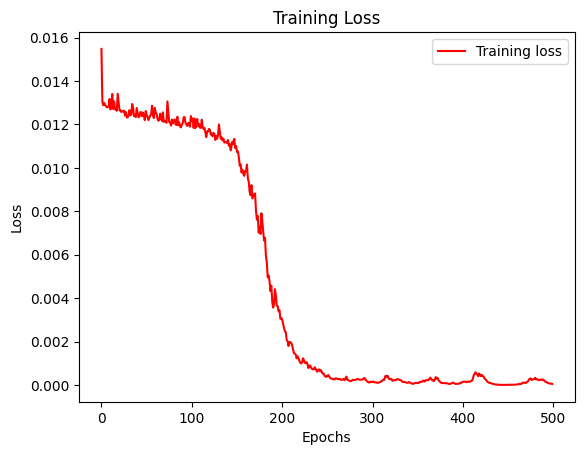

In [10]:
# 繪製訓練損失
loss = hist.history["loss"]
epochs = range(len(loss))
plt.plot(epochs, loss, 'r-', label="Training loss")
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [11]:
# 預測
trainPredict = model.predict(traindataNew)
testPredict = model.predict(testdataNew)
len(trainPredict)


5/5 [==============================] - 1s 11ms/step


576

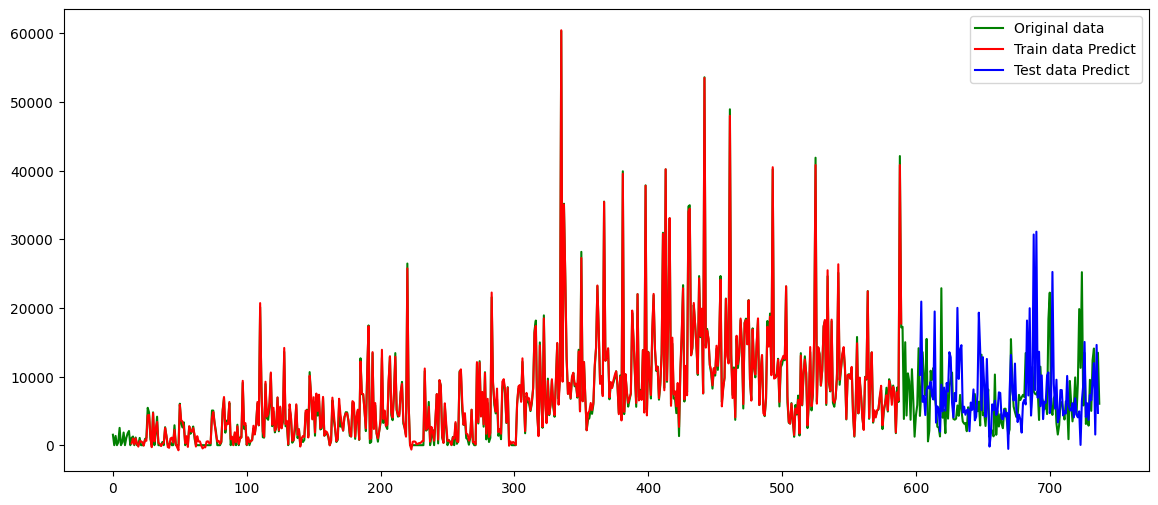

In [12]:
# 逆歸一化
trainRealPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainLabelNew])
testRealPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testLabelNew])
# 繪製預測結果
PredtrainingData = np.empty_like(data)
PredtestData = np.empty_like(data)
originaldata = scaler.inverse_transform(data)
PredtrainingData[:, :] = np.nan
PredtestData[:, :] = np.nan

PredtrainingData[TimeStep: len(trainPredict) + TimeStep, :] = trainRealPredict
PredtestData[len(trainPredict) + (TimeStep * 2) - 1: len(data) - 1, :] = testRealPredict

plt.figure(figsize=(14, 6))
plt.plot(originaldata, color='green', label="Original data")
plt.plot(PredtrainingData, color='red', label="Train data Predict")
plt.plot(PredtestData, color='blue', label="Test data Predict")
plt.legend()
plt.show()

In [13]:
# 預測未來3個月銷售額
future_days = 90
input_data = data[-TimeStep:]
input_data = np.reshape(input_data, (1, TimeStep, 1))

future_predictions = []
for i in range(future_days):
    prediction = model.predict(input_data)
    future_predictions.append(prediction[0])
    input_data = np.concatenate((input_data[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

future_predictions = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 22ms/step


In [14]:
# future_days = 90：定義要預測的天數，即未來3個月（90天）。

# input_data = data[-TimeStep:]：從原始數據（已經歸一化的）中選取最後的 TimeStep（7天）作為輸入數據。

# input_data = np.reshape(input_data, (1, TimeStep, 1))：將輸入數據重新整形為3維數組，以符合GRU模型的輸入要求。尺寸為（batch_size, time_steps, input_dim），在這裡是（1, 7, 1）。

# future_predictions = []：初始化一個空列表，用於存儲未來90天的預測結果。

# for i in range(future_days):：循環遍歷未來90天。

# prediction = model.predict(input_data)：使用先前訓練好的GRU模型對當前的輸入數據進行預測。

# future_predictions.append(prediction[0])：將當前預測結果添加到 future_predictions 列表中。

# input_data = np.concatenate((input_data[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)：更新輸入數據，去掉最早的一天，並將剛剛預測的結果添加到輸入數據的末尾。這樣，下一次迭代時，輸入數據將包含最近的 TimeStep 天（包括剛剛預測的結果）。

# future_predictions = scaler.inverse_transform(future_predictions)：將已預測的未來90天的銷售額從歸一化形式轉換回原始值。

# 最後，future_predictions 包含了未來90天的銷售額預測結果。

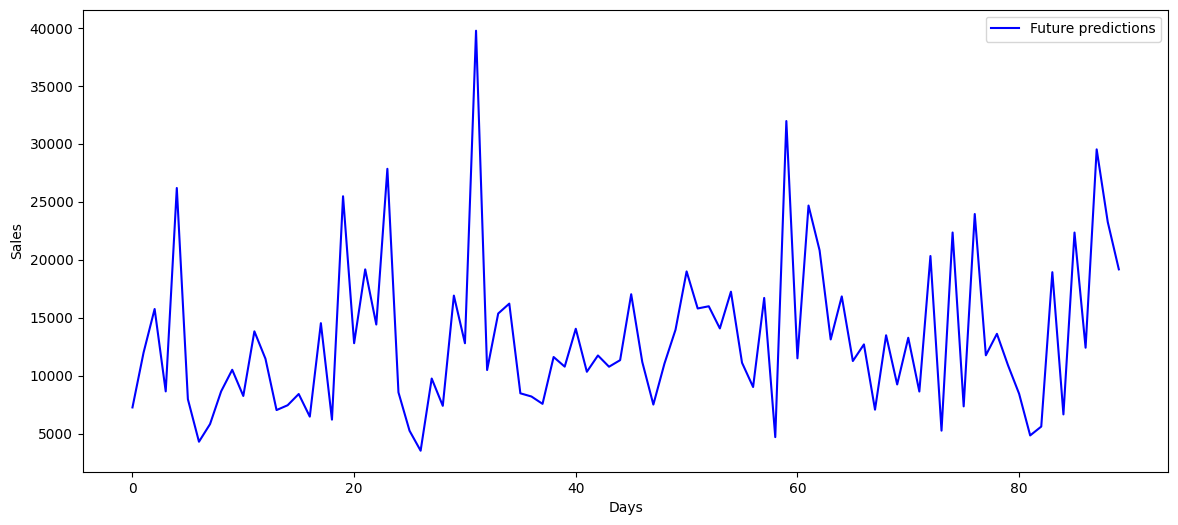

                         Date  Predicted Sales
0  2023-05-05 17:28:07.254992      7263.547269
1  2023-05-06 17:28:07.254992     11985.540291
2  2023-05-07 17:28:07.254992     15750.440652
3  2023-05-08 17:28:07.254992      8645.512013
4  2023-05-09 17:28:07.254992     26182.151895
5  2023-05-10 17:28:07.254992      7972.343295
6  2023-05-11 17:28:07.254992      4306.338704
7  2023-05-12 17:28:07.254992      5828.499135
8  2023-05-13 17:28:07.254992      8648.543397
9  2023-05-14 17:28:07.254992     10509.865583
10 2023-05-15 17:28:07.254992      8252.153024
11 2023-05-16 17:28:07.254992     13823.467238
12 2023-05-17 17:28:07.254992     11460.245958
13 2023-05-18 17:28:07.254992      7035.862159
14 2023-05-19 17:28:07.254992      7451.021136
15 2023-05-20 17:28:07.254992      8420.170113
16 2023-05-21 17:28:07.254992      6469.779433
17 2023-05-22 17:28:07.254992     14527.690566
18 2023-05-23 17:28:07.254992      6210.880144
19 2023-05-24 17:28:07.254992     25470.150531
20 2023-05-25

In [15]:
import pandas as pd
from datetime import datetime, timedelta

# 繪製未來預測結果
plt.figure(figsize=(14, 6))
plt.plot(range(future_days), future_predictions, color='blue', label="Future predictions")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 創建日期範圍
start_date = datetime.today()
date_range = [start_date + timedelta(days=x) for x in range(future_days)]

# 創建 DataFrame 並顯示
predictions_df = pd.DataFrame({'Date': date_range, 'Predicted Sales': np.squeeze(future_predictions)})
pd.set_option('display.max_rows', None)  # 顯示所有行
print(predictions_df)